In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
feature_names = boston.feature_names
data = boston.data
target = boston.target
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [7]:
y_train_scal = scaler.fit_transform(y_train)
y_test_scal = scaler.transform(y_test)

In [8]:
X_train_scal = pd.DataFrame(X_train_scal, columns=feature_names)
X_test_scal = pd.DataFrame(X_test_scal, columns=feature_names)
y_train_scal = pd.DataFrame(y_train_scal, columns=['price'])
y_test_scal = pd.DataFrame(y_test_scal, columns=['price'])

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [11]:
X_train_tsne = tsne.fit_transform(X_train_scal)

In [12]:
y_train_tsne = tsne.fit_transform(y_train_scal)

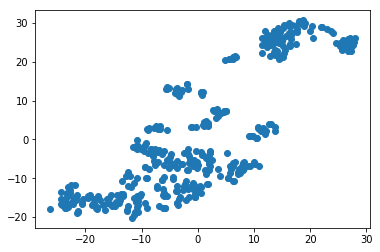

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

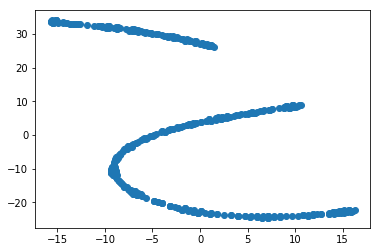

In [14]:
plt.scatter(y_train_tsne[:, 0], y_train_tsne[:, 1])

Задание 2

In [15]:
from sklearn.cluster import KMeans

In [16]:
model = KMeans(n_clusters=3, random_state = 42, max_iter = 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

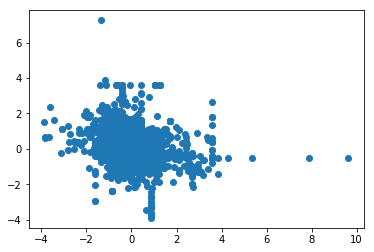

In [55]:
plt.scatter(train_scaled['x'], train_scaled['y'])

In [56]:
train_scaled = pd.DataFrame(train_scaled, columns = ['x', 'y'])

In [58]:
train_labels = model.fit_predict(train_scaled)

In [59]:
train_labels

array([1, 1, 0, ..., 0, 2, 0])

In [64]:
centers = model.cluster_centers_

In [65]:
centers

array([[-0.29682168, -0.580931  ],
       [ 1.43389779,  0.03456088],
       [-0.62072878,  1.1383527 ]])

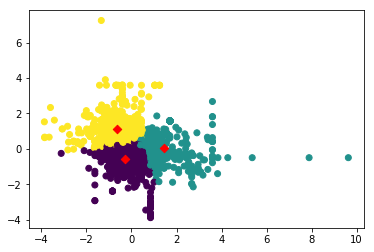

In [67]:
plt.scatter(train_scaled['x'], train_scaled['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

In [70]:
train_scaled[train_labels==0].mean()

x   -0.296822
y   -0.580931
dtype: float64

In [71]:
train_scaled[train_labels==1].mean()

x    1.433898
y    0.034561
dtype: float64

In [90]:
train_scaled[train_labels==2].mean()

x   -0.620729
y    1.138353
dtype: float64